In [32]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Charger les données MNIST
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

# Mélanger les données
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)


/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Dimensions de l'ensemble d'entraînement : (56000, 784)
Dimensions de l'ensemble de test : (14000, 784)


In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier


# Choisissez le chiffre que vous souhaitez prédire (ici, 5)
chosen_digit = 8

# Créer une nouvelle variable cible binaire pour le chiffre choisi
y_train_binary = (y_train == chosen_digit)
y_test_binary = (y_test == chosen_digit)

""" # Initialiser le classificateur SGD
sgd_clf = SGDClassifier(random_state=42)

# Entraîner le classificateur sur l'ensemble d'entraînement binaire
sgd_clf.fit(X_train, y_train_binary)

# Tester la prédiction sur une image spécifique (par exemple, l'image à l'indice 24000)
some_digit = X[24000]
# Prédiction du modèle SGD
sgd_prediction = sgd_clf.predict([some_digit])
print(f"Prédiction du modèle SGD pour l'image : {sgd_prediction}")
 """

# Initialiser le classificateur SGD pour la classification multiclasse
sgd_clf_multiclass = SGDClassifier(random_state=42)

# Entraîner le classificateur sur l'ensemble d'entraînement multiclasse
sgd_clf_multiclass.fit(X_train, y_train)

# Tester la prédiction sur une image spécifique (par exemple, l'image à l'indice 24000)
some_digit = X[24000]

# Prédiction du modèle SGD pour la classification multiclasse
sgd_prediction_multiclass = sgd_clf_multiclass.predict([some_digit])
print(f"Prédiction du modèle SGD pour l'image : {sgd_prediction_multiclass}")

Prédiction du modèle SGD pour l'image : [8]


In [34]:

from sklearn.metrics import precision_score, recall_score

# Évaluer les performances du modèle avec les métriques de précision et de rappel
""" y_test_pred = sgd_clf.predict(X_test)
precision = precision_score(y_test_binary, y_test_pred)
recall = recall_score(y_test_binary, y_test_pred)

# Afficher les résultats
print(f"Précision : {precision}")
print(f"Rappel : {recall}")
 """
 
 
 # Évaluer les performances du modèle SGD avec les métriques de précision et de rappel
y_test_pred_multiclass_sgd = sgd_clf_multiclass.predict(X_test)
precision_sgd = precision_score(
    y_test, y_test_pred_multiclass_sgd, average='weighted')
recall_sgd = recall_score(
    y_test, y_test_pred_multiclass_sgd, average='weighted')

print("\nPerformances du modèle SGD (Classification Multiclasse) :")
print(f"Précision : {precision_sgd}")
print(f"Rappel : {recall_sgd}")



Performances du modèle SGD (Classification Multiclasse) :
Précision : 0.880363811463317
Rappel : 0.8717142857142857


In [35]:
from sklearn.ensemble import RandomForestClassifier

""" # Initialiser le classificateur RandomForest
rf_clf = RandomForestClassifier(random_state=42)

# Entraîner le classificateur RandomForest sur l'ensemble d'entraînement binaire
rf_clf.fit(X_train, y_train_binary)

# Prédiction du modèle RandomForest
rf_prediction = rf_clf.predict([some_digit])
print(f"Prédiction du modèle RandomForest pour l'image : {rf_prediction}")
 """
 
 

# Initialiser le classificateur RandomForest pour la classification multiclasse
rf_clf_multiclass = RandomForestClassifier(random_state=42)

# Entraîner le classificateur RandomForest sur l'ensemble d'entraînement multiclasse
rf_clf_multiclass.fit(X_train, y_train)

# Prédiction du modèle RandomForest pour la classification multiclasse
rf_prediction_multiclass = rf_clf_multiclass.predict([some_digit])
print(
    f"Prédiction du modèle RandomForest pour l'image : {rf_prediction_multiclass}")

# Évaluer les performances du modèle RandomForest avec les métriques de précision et de rappel
y_test_pred_multiclass_rf = rf_clf_multiclass.predict(X_test)
precision_rf = precision_score(
    y_test, y_test_pred_multiclass_rf, average='weighted')
recall_rf = recall_score(y_test, y_test_pred_multiclass_rf, average='weighted')

print("\nPerformances du modèle RandomForest (Classification Multiclasse) :")
print(f"Précision : {precision_rf}")
print(f"Rappel : {recall_rf}")

Prédiction du modèle RandomForest pour l'image : [8]

Performances du modèle RandomForest (Classification Multiclasse) :
Précision : 0.9672867515335132
Rappel : 0.9672857142857143


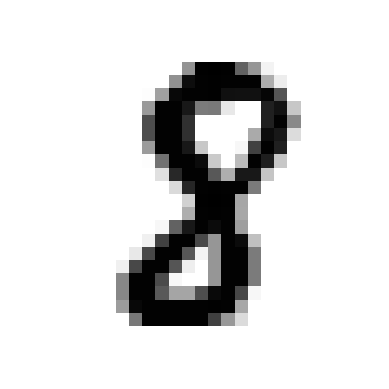

In [36]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [37]:
""" # Évaluer les performances du modèle SGD avec les métriques de précision et de rappel
sgd_precision = precision_score(y_test_binary, sgd_clf.predict(X_test))
sgd_recall = recall_score(y_test_binary, sgd_clf.predict(X_test))

# Évaluer les performances du modèle RandomForest avec les métriques de précision et de rappel
rf_precision = precision_score(y_test_binary, rf_clf.predict(X_test))
rf_recall = recall_score(y_test_binary, rf_clf.predict(X_test))

# Afficher les résultats
print("\nPerformances du modèle SGD :")
print(f"Précision : {sgd_precision}")
print(f"Rappel : {sgd_recall}")

print("\nPerformances du modèle RandomForest :")
print(f"Précision : {rf_precision}")
print(f"Rappel : {rf_recall}")
 """

' # Évaluer les performances du modèle SGD avec les métriques de précision et de rappel\nsgd_precision = precision_score(y_test_binary, sgd_clf.predict(X_test))\nsgd_recall = recall_score(y_test_binary, sgd_clf.predict(X_test))\n\n# Évaluer les performances du modèle RandomForest avec les métriques de précision et de rappel\nrf_precision = precision_score(y_test_binary, rf_clf.predict(X_test))\nrf_recall = recall_score(y_test_binary, rf_clf.predict(X_test))\n\n# Afficher les résultats\nprint("\nPerformances du modèle SGD :")\nprint(f"Précision : {sgd_precision}")\nprint(f"Rappel : {sgd_recall}")\n\nprint("\nPerformances du modèle RandomForest :")\nprint(f"Précision : {rf_precision}")\nprint(f"Rappel : {rf_recall}")\n '